# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane tended to be the most effective at reducing tumor size. 
- Infubinol and Ceftamin were the least effective at reducing tumor size. 
- The treatment of mouse l509 showed substantial decrease in tumor volume using the Capomulin treatment over the 45 day test.
- When looking at the Capomulin regimen, there is strong correlation between mouse weight and tumor volume. Heavier mice tend to have bigger tumors.






In [1]:
import sys
#!{sys.executable} -m pip install scipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice. 
#use .unique() function
mice_count = len(combined_df["Mouse ID"].unique())
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_df.loc[combined_df.duplicated(subset=['Mouse ID',
    'Timepoint',]),'Mouse ID'].unique()
duplicate[0]

'g989'

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean = clean_df['Mouse ID'].value_counts()
number_mice = len(clean)
number_mice

248

In [8]:
len(clean_df["Mouse ID"].unique())

248

In [9]:
means = clean_df.groupby("Drug Regimen").mean(numeric_only=True)
means["Tumor Volume (mm3)"]


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
summary_statistics = {"Mean Tumor Volume": means["Tumor Volume (mm3)"]
                     }
df = pd.DataFrame(summary_statistics)
df

,Mean Tumor Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_df.groupby("Drug Regimen").mean(numeric_only=True)
mean["Tumor Volume (mm3)"]

median = clean_df.groupby('Drug Regimen').median(numeric_only=True)
median["Tumor Volume (mm3)"]

variance = clean_df.groupby('Drug Regimen').var(numeric_only=True)
variance["Tumor Volume (mm3)"]

std_dev = clean_df.groupby('Drug Regimen').std(numeric_only=True)
std_dev["Tumor Volume (mm3)"]

sem = clean_df.groupby('Drug Regimen').sem(numeric_only=True)
sem["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = {"Mean Tumor Volume": means["Tumor Volume (mm3)"],
                      "Median Tumor Volume": median["Tumor Volume (mm3)"],
                      "Tumor Volume Variance": variance["Tumor Volume (mm3)"],
                      "Tumor Volume Std. Dev.": std_dev["Tumor Volume (mm3)"],
                      "Tumor Volume Std. Err.": sem["Tumor Volume (mm3)"]
                     }
df = pd.DataFrame(summary_statistics)
df
                                 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(
    ['mean','median','var','std','sem'])
summary_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [13]:
counts = clean_df["Drug Regimen"].value_counts()
counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

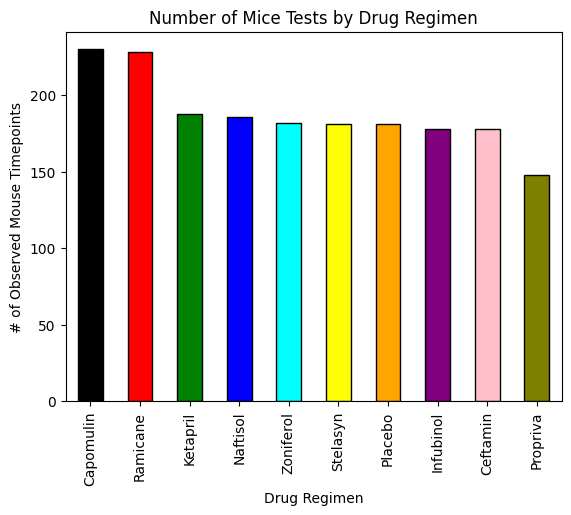

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts.plot(kind="bar", color=['black','red','green','blue','cyan','yellow','orange','purple','pink','olive','brown'],
           edgecolor = 'black')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mice Tests by Drug Regimen")
plt.xticks(rotation=90)
plt.show()




In [15]:
counts.index.values #show names

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [16]:
counts.values #shows counts

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148])

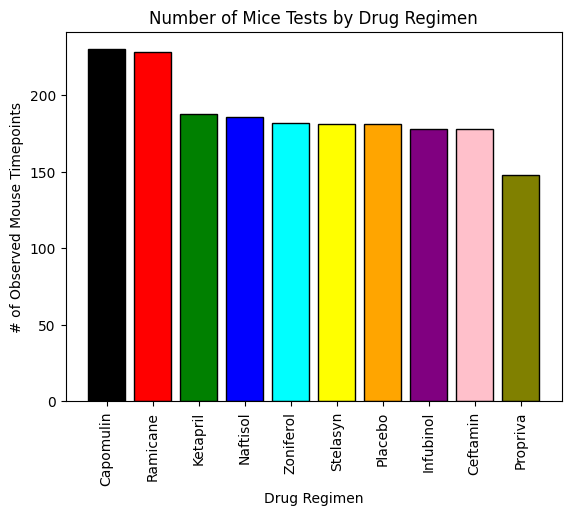

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(counts.index.values, counts.values,
    color=['black','red','green','blue','cyan','yellow','orange','purple','pink','olive','brown'],
           edgecolor = 'black')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mice Tests by Drug Regimen")
plt.xticks(rotation=90)
plt.show()


In [18]:
#calculate gender counts
counts = clean_df["Sex"].value_counts()
counts

Sex
Male      958
Female    922
Name: count, dtype: int64

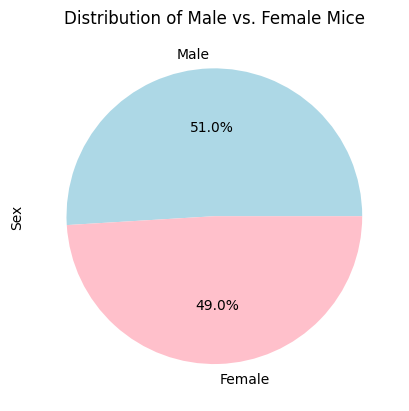

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts.plot(kind="pie", 
            autopct="%1.1f%%",
            colors=['lightblue','pink'],
          )


plt.title("Distribution of Male vs. Female Mice")
plt.ylabel("Sex")
plt.show()



In [20]:
counts.index.values #show names

array(['Male', 'Female'], dtype=object)

In [21]:
counts.values #shows counts

array([958, 922])

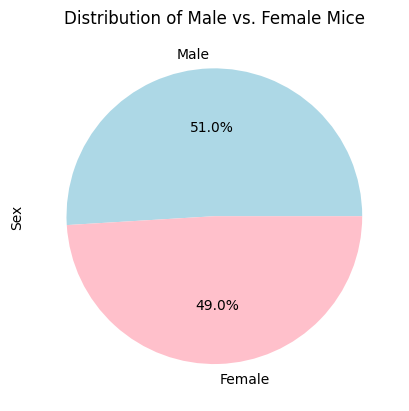

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
    counts.values,
    labels=counts.index.values,
         autopct="%1.1f%%",
            colors=['lightblue','pink'],
          )


plt.title("Distribution of Male vs. Female Mice")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
#reset the index
max_timepoint = max_timepoint.reset_index()
#max_timepoint.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_timepoint.merge(clean_df,on=["Mouse ID","Timepoint"],how="left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

for treatment in treatment_list:
    #print(treatment)
   # Locate the rows which contain mice on each drug and get the tumor volumes - use.loc
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment]

final_tumor_vol





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
3,a275,45,62.999356,3,Ceftamin,Female,20,28
21,b447,0,45.000000,0,Ceftamin,Male,2,30
22,b487,25,56.057749,1,Ceftamin,Female,6,28
25,b759,30,55.742829,1,Ceftamin,Female,12,25
58,f436,15,48.722078,2,Ceftamin,Female,3,25
75,h531,5,47.784682,0,Ceftamin,Male,5,27
88,j296,45,61.849023,3,Ceftamin,Female,24,30
94,k210,45,68.923185,3,Ceftamin,Male,15,28
106,l471,45,67.748662,1,Ceftamin,Female,7,28
107,l490,30,57.918381,3,Ceftamin,Male,24,26


In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
  # Locate the rows which contain mice on each drug and get the tumor volumes
final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

final_tumor_vol #pints ceftamin results

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [26]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_volume_list = []

for treatment in treatment_list:
    #print(treatment)
   # Locate the rows which contain mice on each drug and get the tumor volumes - use.loc
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    #add to empty tumor volume list
    tumor_volume_list.append(final_tumor_vol)

tumor_volume_list #pints list of series



[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [27]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_volume_list = []

for treatment in treatment_list:
    #print(treatment)
   # Locate the rows which contain mice on each drug and get the tumor volumes - use.loc
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    #add to empty tumor volume list
    tumor_volume_list.append(final_tumor_vol)

    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    if len(outliers) == 0:
        print(f"{treatment}'s potential outliers: None")
    else:
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output += f"{o} "
        print(output)
            
        
#tumor_volume_list #prints list of series

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458 
Ceftamin's potential outliers: None


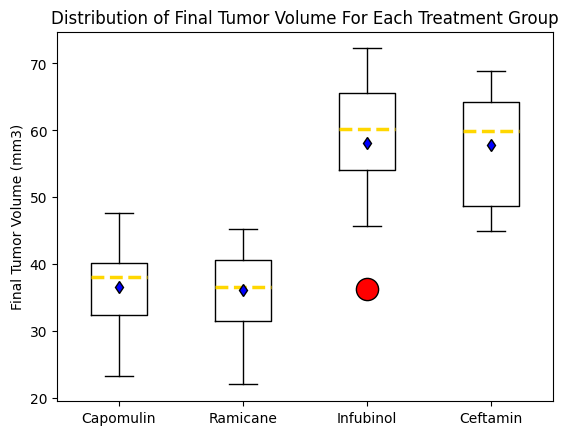

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops = dict(marker='o', markerfacecolor='red', markersize=16, markeredgecolor='black')
medianprops = dict(linestyle='--', linewidth=2.5, color='gold')
meanpointprops = dict(marker='d',markeredgecolor='black', markerfacecolor='blue')
plt.boxplot(tumor_volume_list, labels = treatment_list, flierprops=flierprops, medianprops=medianprops, meanprops=meanpointprops, 
            showmeans=True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volume For Each Treatment Group')
plt.show()


## Line and Scatter Plots

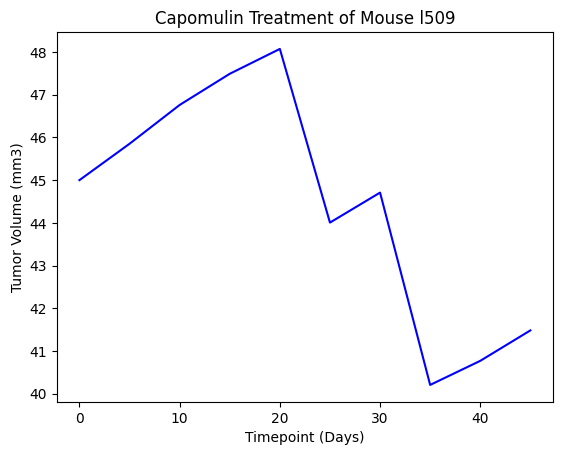

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"] 
#capomulin_df.head()

l509data = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509"]
l509data #we just beed the Timepoint(x) and hte Tumor Volume Columes (y)

plt.plot(l509data["Timepoint"],l509data["Tumor Volume (mm3)"],
         color="blue")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

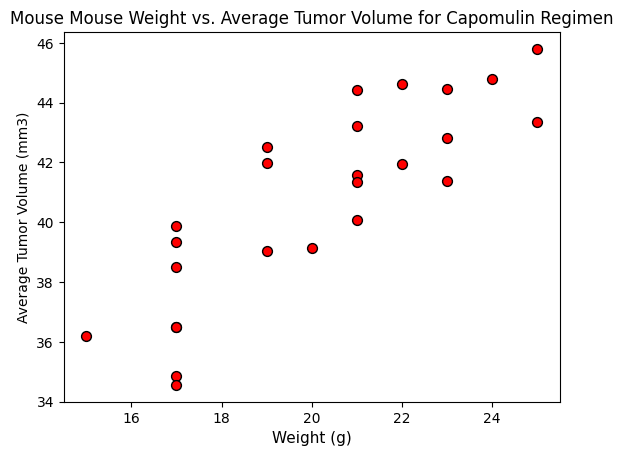

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#group by the mouse ID and take the mean
capomulin_avg_df = capomulin_df.groupby("Mouse ID").mean(numeric_only=True)
capomulin_avg_df.head() #only need weight (g) x-axis and the tumor valume y-axis

plt.scatter(
    capomulin_avg_df["Weight (g)"],
    capomulin_avg_df["Tumor Volume (mm3)"],
    facecolor="red",
    edgecolor="black",
    s=50
)
plt.xlabel('Weight (g)',fontsize =11)
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show
   


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


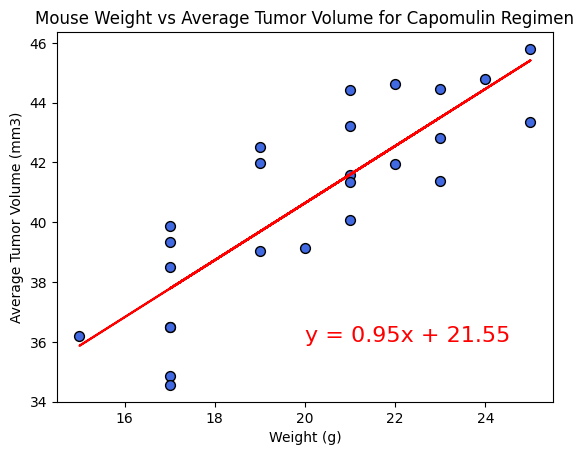

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = st.pearsonr(capomulin_avg_df['Weight (g)'],capomulin_avg_df['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and the average tumor volume is {corr:.2f}")

x_values = capomulin_avg_df["Weight (g)"]
y_values = capomulin_avg_df["Tumor Volume (mm3)"]

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(capomulin_avg_df["Weight (g)"],
                                                        capomulin_avg_df["Tumor Volume (mm3)"])
regress_values=capomulin_avg_df["Weight (g)"]* slope + intercept
line_eq= f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values, y_values, facecolor='royalblue', edgecolor='black', s=50)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,36), fontsize=16, color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Regimen")
plt.show()

